<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_3_1_2_learning_rate_scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from matplotlib import pyplot as plt

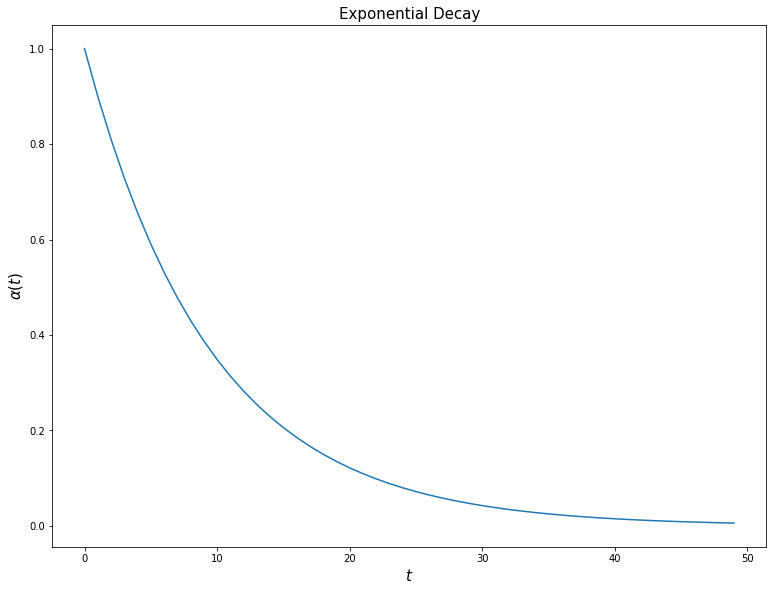

In [ ]:
start = [250., 350.]
w     = torch.tensor(start, requires_grad=True)
model = [w]
optimizer = torch.optim.SGD(model, lr=1)

decay = lambda previous_lr: 0.9 ** previous_lr
scheduler = torch.optim.lr_scheduler.LambdaLR(
    optimizer, lr_lambda=decay)

num_epochs      = 50
num_minibatches = 1
alphas = torch.zeros(num_epochs)

for epoch in range(num_epochs):
    for batch in range(num_minibatches):
      optimizer.step()
    alphas[epoch] = optimizer.param_groups[0]["lr"]
    scheduler.step()

plt.figure(figsize=[12.8, 9.6])
plt.plot(range(num_epochs), alphas);
plt.title("Exponential Decay", size=15);
plt.xlabel("$t$", size=15);
plt.ylabel(r"$\alpha(t)$", size=15);

In [ ]:
def eggholder(w0, w1):
  a = -(w1+47) * torch.sin(torch.sqrt(torch.abs(w1 + w0/2 + 47)))
  b = -w0 * torch.sin(torch.sqrt(torch.abs(w0 - (w1 + 47))))
  return a+b
range0, range1 = torch.linspace(0, 512, 1000), torch.linspace(0, 512, 1000)
grid0, grid1   = torch.meshgrid(range0, range1)
grid_cost      = torch.zeros(grid0.size())
grid_cost      = eggholder(grid0, grid1)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


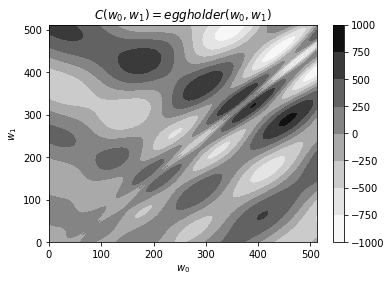

In [ ]:
plt.figure()
plt.contourf(grid0, grid1, grid_cost, cmap="Greys");
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.title("$C(w_0,w_1)=eggholder(w_0,w_1)$")
plt.colorbar();

In [ ]:
def draw_descent():
  plt.contourf(grid0, grid1, grid_cost, cmap="Greys");
  plt.scatter(history[0,0], history[0,1], marker="o", color="r")
  plt.scatter(history[-1,0], history[-1,1], marker="x", s=100, color="r")
  plt.plot(history[:,0], history[:,1], linestyle=':', marker="x", color="r")
  plt.xlabel("$w_0$");
  plt.ylabel("$w_1$");

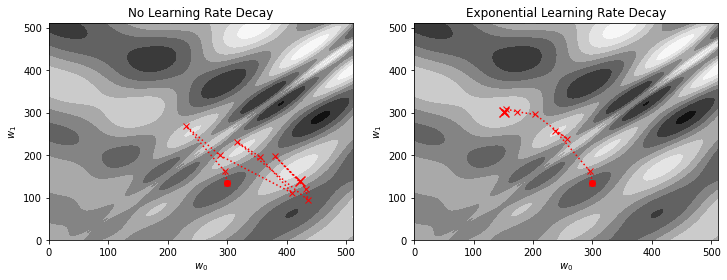

In [ ]:
def GD_egg(alpha=5, start=[300., 135.], decay_flag=False):
  w          = torch.tensor(start, requires_grad=True)
  model      = [w]
  num_epochs = 10
  optimizer  = torch.optim.SGD(model, lr=alpha)
  if decay_flag:
    decay = lambda previous_lr: 0.9 ** previous_lr
    scheduler = torch.optim.lr_scheduler.LambdaLR(
        optimizer, lr_lambda=decay)

  history      = torch.zeros(1+num_epochs,2)
  history[0,:] = w.detach()

  for epoch in range(num_epochs):
    optimizer.zero_grad()
    cost = eggholder(w[0], w[1])
    cost.backward()
    optimizer.step()
    if decay_flag:
      scheduler.step()
    history[1+epoch,:] = w.detach()

  return history

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
history = GD_egg()
draw_descent()
plt.title("No Learning Rate Decay");

plt.subplot(1,2,2)
history = GD_egg(decay_flag=True)
draw_descent()
plt.title("Exponential Learning Rate Decay");

In [ ]:
history

tensor([[300.0000, 135.0000],
        [296.0009, 161.3980],
        [237.7014, 257.3612],
        [257.3096, 238.8188],
        [203.6165, 295.5658],
        [172.9745, 301.9870],
        [154.8212, 308.6756],
        [153.6663, 301.9821],
        [151.7543, 302.1212],
        [151.1046, 301.7256],
        [150.7610, 301.5601]])

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


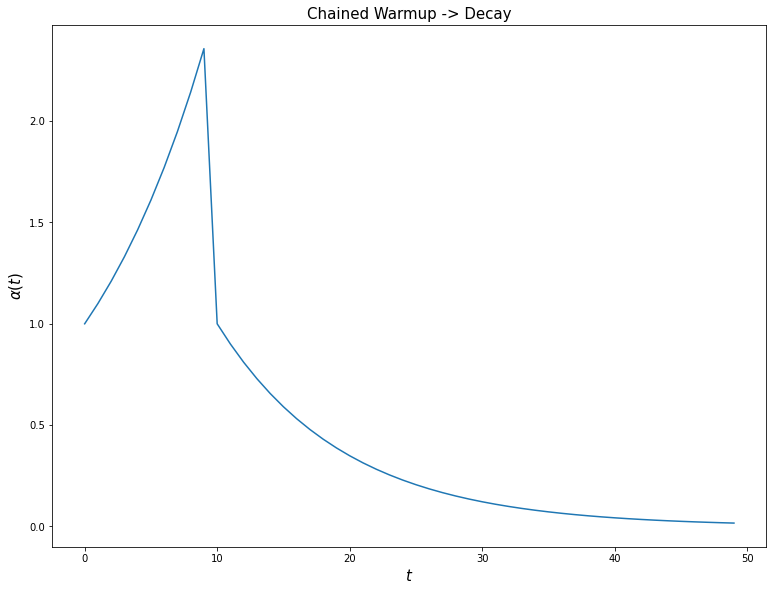

In [ ]:
start=[250.,350.]
w         = torch.tensor(start,requires_grad=True)
model     = [w]
optimizer = torch.optim.SGD(model, lr=1)
warmup = lambda previous_lr: 1.1 ** previous_lr 
decay  = lambda previous_lr: 0.9 ** previous_lr
scheduler1 = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=warmup)
scheduler2 = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=decay)
scheduler  = torch.optim.lr_scheduler.SequentialLR(optimizer,
            schedulers=[scheduler1, scheduler2], milestones=[10])

num_epochs = 50
num_minibatches = 1
alphas =torch.zeros(num_epochs)

for epoch in range(num_epochs):
    for batch in range(num_minibatches):
      optimizer.step()
    alphas[epoch] = optimizer.param_groups[0]["lr"]
    scheduler.step()

plt.figure(figsize=[12.8, 9.6])
plt.plot(range(num_epochs), alphas);
plt.title("Chained Warmup -> Decay", size=15);
plt.xlabel("$t$", size=15);
plt.ylabel(r"$\alpha(t)$", size=15);